## ДЗ №5
### Тарабонда Герман

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from typing import Callable, NoReturn

In [2]:
def generate_confid_intervsl_a(
        n:     int, 
        sigma: float, 
        gamma: float) -> float:
    data = np.random.default_rng().normal(0, sigma, n)
    data_sum = np.sum(np.power(data, 2))
    fst_quant = st.chi2.ppf((1 + gamma) / 2, n, 0, sigma)
    snd_quant = st.chi2.ppf((1 - gamma) / 2, n, 0, sigma)
    return (data_sum / snd_quant) - (data_sum / fst_quant)

def generate_confid_intervsl_b(
        n:     int, 
        sigma: float, 
        gamma: float) -> float:
    data_sum = np.mean(np.random.default_rng().normal(0, sigma, n)) ** 2
    fst_quant = st.norm.ppf((3 + gamma) / 4, 0, sigma) ** 2
    snd_quant = st.norm.ppf((3 - gamma) / 4, 0, sigma) ** 2
    return (n * data_sum / snd_quant) - (n * data_sum / fst_quant)

In [3]:
def plot_graphics(
        sigma: float, 
        gamma: float,
        iters: int,
        interval_func: Callable[[int, float, float], float]) -> NoReturn:
    Ns = range(100, 1000)
    results = []
    for n in Ns:
        res = [interval_func(n, sigma, gamma) for _ in range(iters)]
        results.append(np.mean(np.array(res)))
    
    plt.plot(Ns, results, color='darkorchid')
    plt.title('Length of interval')
    plt.show()

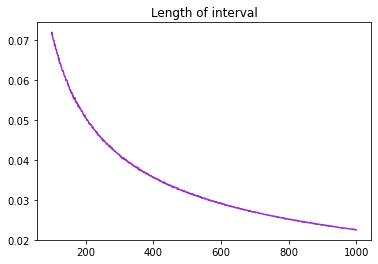

In [4]:
plot_graphics(2, 0.1, 1000, generate_confid_intervsl_a)

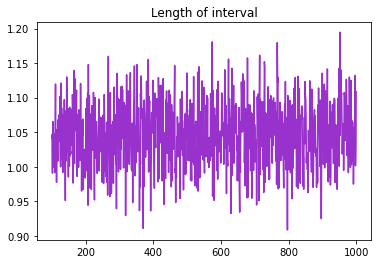

In [5]:
plot_graphics(2, 0.1, 1000, generate_confid_intervsl_b)